**Part 4 – Machine Learning w/ More Models**

_This is the codes to examine other commonly used machine learning models._

In [1]:
# import packages
import numpy as np
import os
import pandas as pd

#Set random seed
np.random.seed(42)

#Fig packages import
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt
plt.rcParams['axes.labelsize'] = 14
plt.rcParams['xtick.labelsize'] = 12
plt.rcParams['ytick.labelsize'] = 12

# Import Maching Learning Dataset

Import machine learning dataset, and extract X and y from ML_Data

In [2]:
ML_Data = pd.read_csv('YourPath/ML_Dataset.csv')
ML_Data = ML_Data.drop(ML_Data.columns[0], axis=1)
X = ML_Data.drop(ML_Data.columns[-1], axis=1)
y = ML_Data['yield']

# Data Preprocessing

Use standardscaler to process X.

In [3]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Data Splitting

Randomly split (70/30) data X, y into training set and test set.

To keep the results reproductive, set the randome_state = 42.

In [4]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.3, random_state=42)

# Simple Linear Regression

The part just repeat what we did in Part 3. 

In [5]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

lin_reg = LinearRegression()
lin_reg.fit(X_train, y_train)
y_pred_lin = lin_reg.predict(X_test)

RMSE_lin = np.sqrt(mean_squared_error(y_test, y_pred_lin))
R2_lin = r2_score(y_test, y_pred_lin)

print((RMSE_lin, R2_lin))

(15.194078464653234, 0.7111764988611924)


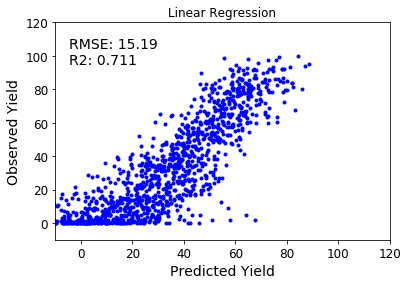

In [6]:
plt.plot(y_pred_lin, y_test, 'b.')
plt.title('Linear Regression')
plt.axis([-10, 120, -10, 120])
plt.xlabel('Predicted Yield')
plt.ylabel('Observed Yield')
plt.text(30, 95, "RMSE: 15.19\nR2: 0.711", size=14, va="baseline", ha="right", multialignment="left")
plt.show()

# Logistic Regression

For logistic regression, data type of y as float is not acceptable, so we need to convert the data type of y into interger first (using astype() method), then train the model. 

More details can be checked in this question (https://stackoverflow.com/questions/41925157/logisticregression-unknown-label-type-continuous-using-sklearn-in-python).

In [7]:
y_train, y_test = y_train.astype(np.int), y_test.astype(np.int)

In [8]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import mean_squared_error, r2_score

log_reg = LogisticRegression(solver='liblinear', random_state=42, multi_class='auto')
log_reg.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='auto',
          n_jobs=None, penalty='l2', random_state=42, solver='liblinear',
          tol=0.0001, verbose=0, warm_start=False)

In [9]:
y_pred_log = log_reg.predict(X_test)

RMSE_log = np.sqrt(mean_squared_error(y_test, y_pred_log))
R2_log = r2_score(y_test, y_pred_log)

print((RMSE_log, R2_log))

(18.3102241866207, 0.5800515441651417)


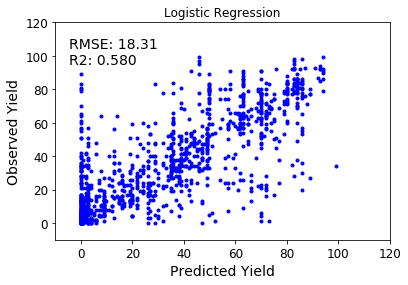

In [10]:
plt.plot(y_pred_log, y_test, 'b.')
plt.title('Logistic Regression')
plt.axis([-10, 120, -10, 120])
plt.xlabel('Predicted Yield')
plt.ylabel('Observed Yield')
plt.text(30, 95, "RMSE: 18.31\nR2: 0.580", size=14, va="baseline", ha="right", multialignment="left")
plt.show()

The result didn't get imporved by logistic regression model.

Now let's check another model, Bayesian Ridge Regression.

# Bayesian Ridge Regression

In [11]:
from sklearn.linear_model import BayesianRidge
from sklearn.metrics import mean_squared_error, r2_score

bayes_reg = BayesianRidge()
bayes_reg.fit(X_train, y_train)

BayesianRidge(alpha_1=1e-06, alpha_2=1e-06, compute_score=False, copy_X=True,
       fit_intercept=True, lambda_1=1e-06, lambda_2=1e-06, n_iter=300,
       normalize=False, tol=0.001, verbose=False)

In [12]:
y_pred_bayes = bayes_reg.predict(X_test)

RMSE_bayes = np.sqrt(mean_squared_error(y_test, y_pred_bayes))
R2_bayes = r2_score(y_test, y_pred_bayes)

print((RMSE_bayes, R2_log))

(15.48097987955532, 0.5800515441651417)


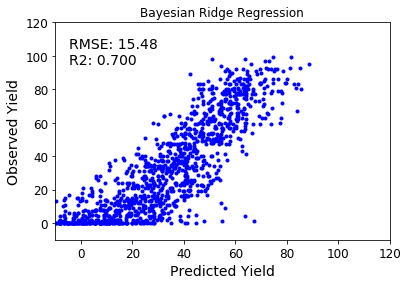

In [13]:
plt.plot(y_pred_bayes, y_test, 'b.')
plt.title('Bayesian Ridge Regression')
plt.axis([-10, 120, -10, 120])
plt.xlabel('Predicted Yield')
plt.ylabel('Observed Yield')
plt.text(30, 95, "RMSE: 15.48\nR2: 0.700", size=14, va="baseline", ha="right", multialignment="left")
plt.show()

The Bayesian Ridge Regression model result is close to the Linear Regression model.

# k-Nearest Neighbors (kNN)

First, we will check a kNN model with the default value n_neighbors=5. 

In [14]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error, r2_score

knn_reg = KNeighborsRegressor(n_neighbors=5)
knn_reg.fit(X_train, y_train)

KNeighborsRegressor(algorithm='auto', leaf_size=30, metric='minkowski',
          metric_params=None, n_jobs=None, n_neighbors=5, p=2,
          weights='uniform')

In [15]:
y_pred_knn = knn_reg.predict(X_test)

RMSE_knn = np.sqrt(mean_squared_error(y_test, y_pred_knn))
R2_knn = r2_score(y_test, y_pred_knn)

print((RMSE_knn, R2_knn))

(18.119425184689746, 0.5887579669962344)


Let's do a grid-search to find the best parameters. 

The way that grid-search works is to pass a list for one/multiple parameters, then train the model several times with each one data in the list, then obtain the best parameter to build the model.

For our kNN case here, we have one parameter to search, the n_neighbors.

First We need to define the range for the search.

In [16]:
from sklearn.model_selection import GridSearchCV, cross_val_score
k_list = list(range(1, 31))
print(k_list)

[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30]


Second step is to create a parameter grid (a python dictionary), by passing the parameters name and range.

In [17]:
param_grid = dict(n_neighbors=k_list)
print(param_grid)

{'n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30]}


Now we can start the grid-search. It will run 30 x 10 = 300 times kNN model training. The following codes may take some time, which depends on your computer configurations.

In [18]:
knn_grid = KNeighborsRegressor()

grid_search = GridSearchCV(knn_grid, param_grid, cv=10,
                           scoring='neg_mean_squared_error', return_train_score=True)
grid_search.fit(X_train, y_train)

GridSearchCV(cv=10, error_score='raise-deprecating',
       estimator=KNeighborsRegressor(algorithm='auto', leaf_size=30, metric='minkowski',
          metric_params=None, n_jobs=None, n_neighbors=5, p=2,
          weights='uniform'),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid={'n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
       scoring='neg_mean_squared_error', verbose=0)

In [19]:
print(grid_search.best_params_)
print(grid_search.best_score_)

{'n_neighbors': 9}
-274.61027826768566


Now we use the best parameter of n_neighbors=9 to run the model and test the performance of the model.

In [20]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error, r2_score

knn_reg = KNeighborsRegressor(n_neighbors=9)
knn_reg.fit(X_train, y_train)

y_pred_knn = knn_reg.predict(X_test)
RMSE_knn = np.sqrt(mean_squared_error(y_test, y_pred_knn))
R2_knn = r2_score(y_test, y_pred_knn)

print('RMSE:', RMSE_knn)
print('R2 Score:', R2_knn)

RMSE: 17.241582169670906
R2 Score: 0.6276401062721194


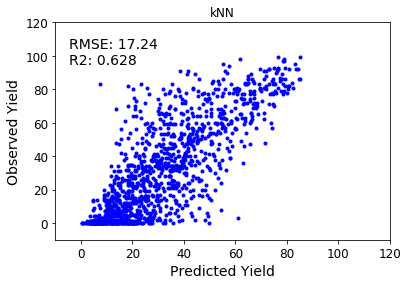

In [21]:
plt.plot(y_pred_knn, y_test, 'b.')
plt.title('kNN')
plt.axis([-10, 120, -10, 120])
plt.xlabel('Predicted Yield')
plt.ylabel('Observed Yield')
plt.text(30, 95, "RMSE: 17.24\nR2: 0.628", size=14, va="baseline", ha="right", multialignment="left")
plt.show()

# Support Vector Machine (SVM)

First, let's just check a linear SVM model with default setting and see its result.

In [22]:
from sklearn.svm import LinearSVR
svm_reg = LinearSVR(random_state=42)
svm_reg.fit(X_train, y_train)

LinearSVR(C=1.0, dual=True, epsilon=0.0, fit_intercept=True,
     intercept_scaling=1.0, loss='epsilon_insensitive', max_iter=1000,
     random_state=42, tol=0.0001, verbose=0)

In [23]:
from sklearn.metrics import mean_squared_error, r2_score

y_pred_svm = svm_reg.predict(X_test)
RMSE_svm = np.sqrt(mean_squared_error(y_test, y_pred_svm))
R2_svm = r2_score(y_test, y_pred_svm)

print('RMSE:', RMSE_svm)
print('R2 Score:', R2_svm)

RMSE: 16.174962231165782
R2 Score: 0.6722858333965693


Now let's do a grid-search to find good parameters.

For SVM, we will do grid-search from three parameters: C, gamma and kernel. To reduce the training time, we will use CV=5 instead of 10 like we used for kNN. 

In total, we will have 3x3x2x5=90 times of SVM training. The following codes may take some time (a little bit longer than previous kNN model)

In [24]:
from sklearn.model_selection import GridSearchCV, cross_val_score
from sklearn.svm import SVR

param_grid = {'C': [0.001, 0.01, 0.1],
              'gamma': [0.001, 0.01, 0.1],
              'kernel': ['poly','linear']}

svm_grid = SVR()
svm_grid_search = GridSearchCV(svm_grid, param_grid, cv=5,
                           scoring='neg_mean_squared_error', return_train_score=True)
svm_grid_search.fit(X_train, y_train)

GridSearchCV(cv=5, error_score='raise-deprecating',
       estimator=SVR(C=1.0, cache_size=200, coef0=0.0, degree=3, epsilon=0.1,
  gamma='auto_deprecated', kernel='rbf', max_iter=-1, shrinking=True,
  tol=0.001, verbose=False),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid={'C': [0.001, 0.01, 0.1], 'gamma': [0.001, 0.01, 0.1], 'kernel': ['poly', 'linear']},
       pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
       scoring='neg_mean_squared_error', verbose=0)

In [25]:
print(svm_grid_search.best_params_)
print(svm_grid_search.best_score_)

{'C': 0.1, 'gamma': 0.1, 'kernel': 'poly'}
-118.66298239111518


After the search, we obtain the best parameters in our search-grid. Now we can use these values to train a SVM model.

In [27]:
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error, r2_score

svm_reg = SVR(C=0.1, gamma=0.1, kernel='poly')
svm_reg.fit(X_train, y_train)

y_pred_svm = svm_reg.predict(X_test)
RMSE_svm = np.sqrt(mean_squared_error(y_test, y_pred_svm))
R2_svm = r2_score(y_test, y_pred_svm)

print('RMSE:', RMSE_svm)
print('R2 Score:', R2_svm)

RMSE: 10.309178352593287
R2 Score: 0.8668758733990146


As we can see, the SVM model after optimization (grid-search), perform much better than the first SVM model (LinearSVR), also performed better than the linear regression model.

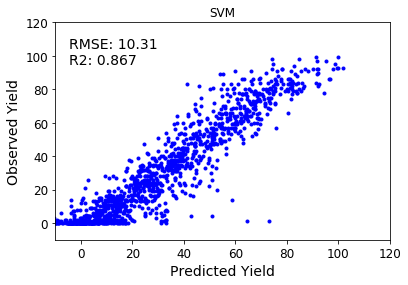

In [28]:
plt.plot(y_pred_svm, y_test, 'b.')
plt.title('SVM')
plt.axis([-10, 120, -10, 120])
plt.xlabel('Predicted Yield')
plt.ylabel('Observed Yield')
plt.text(30, 95, "RMSE: 10.31\nR2: 0.867", size=14, va="baseline", ha="right", multialignment="left")
plt.show()

Now let's move to next model: RandomForest.

# Random Forest 

First let's just train a random forest model to see how it looks.

In [29]:
from sklearn.ensemble import RandomForestRegressor
rf_reg = RandomForestRegressor(max_depth=2, random_state=42, n_estimators=100)
rf_reg.fit(X_train, y_train)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=2,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=None,
           oob_score=False, random_state=42, verbose=0, warm_start=False)

In [30]:
from sklearn.metrics import mean_squared_error, r2_score

y_pred_rf = rf_reg.predict(X_test)

RMSE_rf = np.sqrt(mean_squared_error(y_test, y_pred_rf))
R2_rf = r2_score(y_test, y_pred_rf)

print('RMSE:', RMSE_rf)
print('R2 Score:', R2_rf)

RMSE: 20.06120832383089
R2 Score: 0.49589286907553676


As we can see, the model didn't perform well. Now we will start the grid-search to optimize the parameters of the RF model.

Since RandomForest model have several parameters we can tune, and do a simple grid search will be really time-consuming. So in this part, we will use random search to find good parameters. 

Randomized search is very similar to grid-search, and we need to provide a search range for each parameters and how many times of random search (combination) we want to perform. 

First we need to define search parameters.

In [35]:
# Number of trees
n_estimators = [int(x) for x in np.linspace(start = 200, stop = 2000, num = 10)]
# Number of features to consider at every split
max_features = ['auto', 'sqrt']
# Maximum number of levels 
max_depth = [int(x) for x in np.linspace(10, 110, num = 11)]
max_depth.append(None)
# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 4]
# Method of selecting samples for training each tree
bootstrap = [True, False]


random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}

Now we can start the randomsearch. 

I set the n_jobs=-1, which means use all the available processors, and save some time during the training.

In [36]:
from sklearn.model_selection import RandomizedSearchCV, cross_val_score
from sklearn.ensemble import RandomForestRegressor

rf_grid = RandomForestRegressor(random_state=42)

rf_grid_search = RandomizedSearchCV(rf_grid, random_grid, n_iter=30, cv=5, n_jobs=-1,
                           scoring='neg_mean_squared_error', return_train_score=True)
rf_grid_search.fit(X_train, y_train)

RandomizedSearchCV(cv=5, error_score='raise-deprecating',
          estimator=RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators='warn', n_jobs=None,
           oob_score=False, random_state=42, verbose=0, warm_start=False),
          fit_params=None, iid='warn', n_iter=30, n_jobs=-1,
          param_distributions={'n_estimators': [200, 400, 600, 800, 1000, 1200, 1400, 1600, 1800, 2000], 'max_features': ['auto', 'sqrt'], 'max_depth': [10, 20, 30, 40, 50, 60, 70, 80, 90, 100, 110, None], 'min_samples_split': [2, 5, 10], 'min_samples_leaf': [1, 2, 4], 'bootstrap': [True, False]},
          pre_dispatch='2*n_jobs', random_state=None, refit=True,
          return_train_score=True, scoring='neg_mean_squared_error',
          verbose=0)

In [37]:
print(rf_grid_search.best_params_)
print(rf_grid_search.best_score_)

{'n_estimators': 200, 'min_samples_split': 2, 'min_samples_leaf': 1, 'max_features': 'sqrt', 'max_depth': 40, 'bootstrap': False}
-70.92145080642737


Let's build a new RF model with these optimized parameters.

In [39]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score

rf_reg = RandomForestRegressor(n_estimators=200, min_samples_split=2, min_samples_leaf=1,
                               max_features='sqrt', bootstrap=False,
                               max_depth=40, random_state=42)
rf_reg.fit(X_train, y_train)
y_pred_rf = rf_reg.predict(X_test)

RMSE_rf = np.sqrt(mean_squared_error(y_test, y_pred_rf))
R2_rf = r2_score(y_test, y_pred_rf)

print('RMSE:', RMSE_rf)
print('R2 Score:', R2_rf)

RMSE: 7.543053838166214
R2 Score: 0.9287306036820584


As showed, the optimized model performed much better than the first RF model, and much better than the SVM model. The results are a little bit better than the RF model in the paper (Figure 2A).

Let's make the plot.

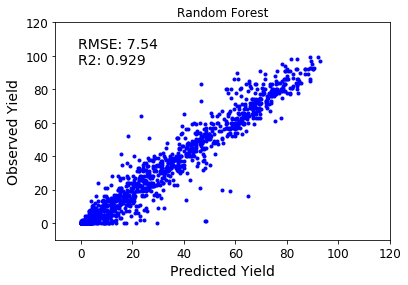

In [41]:
plt.plot(y_pred_rf, y_test, 'b.')
plt.title('Random Forest')
plt.axis([-10, 120, -10, 120])
plt.xlabel('Predicted Yield')
plt.ylabel('Observed Yield')
plt.text(30, 95, "RMSE: 7.54\nR2: 0.929", size=14, va="baseline", ha="right", multialignment="left")
plt.show()

Now let's move forward to the last model we are going to test: neural network (NN). 

Usually NN models are used for much much larger dataset and training more complicated models. And at same time, GPU is also used to speed the training process. Some commonly used software/packages/API include Keras, tensorflow, PyTorch etc.

Since the dataset in our case is very small, and we don't need to build a very deep/complicated model. To keep consistency in this part, we will keep use the scikit-learn package to train the neural network. 

# Neural Network

Let's check a NN model first. 

In [43]:
from sklearn.neural_network import MLPRegressor

nn_reg = MLPRegressor(random_state=42, max_iter=1000)
nn_reg.fit(X_train, y_train)

MLPRegressor(activation='relu', alpha=0.0001, batch_size='auto', beta_1=0.9,
       beta_2=0.999, early_stopping=False, epsilon=1e-08,
       hidden_layer_sizes=(100,), learning_rate='constant',
       learning_rate_init=0.001, max_iter=1000, momentum=0.9,
       n_iter_no_change=10, nesterovs_momentum=True, power_t=0.5,
       random_state=42, shuffle=True, solver='adam', tol=0.0001,
       validation_fraction=0.1, verbose=False, warm_start=False)

In [44]:
from sklearn.metrics import mean_squared_error, r2_score

y_pred_nn = nn_reg.predict(X_test)

RMSE_nn = np.sqrt(mean_squared_error(y_test, y_pred_nn))
R2_nn = r2_score(y_test, y_pred_nn)

print('RMSE:', RMSE_nn)
print('R2 Score:', R2_nn)

RMSE: 7.859474447413166
R2 Score: 0.9226258879933684


The model actually performed well! Let's do a random search to see if the model can be optimized further.

The following codes take some time (you can take a walk break :)  ) 

In [46]:
from sklearn.model_selection import RandomizedSearchCV, cross_val_score
from sklearn.neural_network import MLPRegressor

nn_grid = MLPRegressor(random_state=42, max_iter=1000)

random_grid = {'activation': ['relu', 'tanh', 'logistic'],
               'solver': ['adam', 'sgd', 'lbfgs'],
               'learning_rate': ['constant', 'adaptive'],
               'alpha': [0.0001, 0.0002, 0.0005],
               'learning_rate_init': [0.001, 0.002]}

nn_grid_search = RandomizedSearchCV(nn_grid, random_grid, n_iter=30, cv=5, n_jobs=-1,
                           scoring='neg_mean_squared_error', return_train_score=True)
nn_grid_search.fit(X_train, y_train)

RandomizedSearchCV(cv=5, error_score='raise-deprecating',
          estimator=MLPRegressor(activation='relu', alpha=0.0001, batch_size='auto', beta_1=0.9,
       beta_2=0.999, early_stopping=False, epsilon=1e-08,
       hidden_layer_sizes=(100,), learning_rate='constant',
       learning_rate_init=0.001, max_iter=1000, momentum=0.9,
       n_iter_no_change=10, nesterovs_momentum=True, power_t=0.5,
       random_state=42, shuffle=True, solver='adam', tol=0.0001,
       validation_fraction=0.1, verbose=False, warm_start=False),
          fit_params=None, iid='warn', n_iter=30, n_jobs=-1,
          param_distributions={'activation': ['relu', 'tanh', 'logistic'], 'solver': ['adam', 'sgd', 'lbfgs'], 'learning_rate': ['constant', 'adaptive'], 'alpha': [0.0001, 0.0002, 0.0005], 'learning_rate_init': [0.001, 0.002]},
          pre_dispatch='2*n_jobs', random_state=None, refit=True,
          return_train_score=True, scoring='neg_mean_squared_error',
          verbose=0)

In [47]:
print(nn_grid_search.best_params_)
print(nn_grid_search.best_score_)

{'solver': 'sgd', 'learning_rate_init': 0.002, 'learning_rate': 'adaptive', 'alpha': 0.0001, 'activation': 'relu'}
-65.87553442626718


Now let's build a new NN model with optimized parameters. 

In [48]:
from sklearn.neural_network import MLPRegressor
from sklearn.metrics import mean_squared_error, r2_score


nn_reg = MLPRegressor(random_state=42, activation='relu', solver='sgd', learning_rate_init=0.002,
                      learning_rate='adaptive', alpha=0.0001, max_iter=1000)
nn_reg.fit(X_train, y_train)

y_pred_nn = nn_reg.predict(X_test)

RMSE_nn = np.sqrt(mean_squared_error(y_test, y_pred_nn))
R2_nn = r2_score(y_test, y_pred_nn)

print('RMSE:', RMSE_nn)
print('R2 Score:', R2_nn)

RMSE: 7.599939080002781
R2 Score: 0.9276516072882957


The new NN model performed better than the first NN model, and the performance is very close to the RF model we trained.

Let's plot the result now.

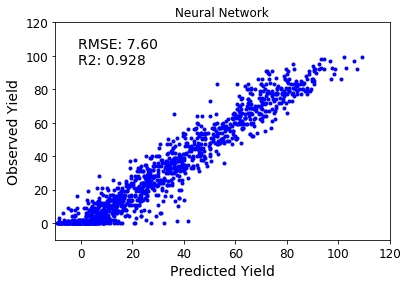

In [49]:
plt.plot(y_pred_nn, y_test, 'b.')
plt.title('Neural Network')
plt.axis([-10, 120, -10, 120])
plt.xlabel('Predicted Yield')
plt.ylabel('Observed Yield')
plt.text(30, 95, "RMSE: 7.60\nR2: 0.928", size=14, va="baseline", ha="right", multialignment="left")
plt.show()

# Summary for Part 4

Till now, we have tried several commonly used machine learning models including train and optimization. 

In comparison, Random Forest has the best performance and Neural Net work has very similar performance (2nd). These two models outperform other models. 

In Part5, we will use the optimized Random Forest model to explore more details of these reaction data. 

The summary plot of so-far trained models:

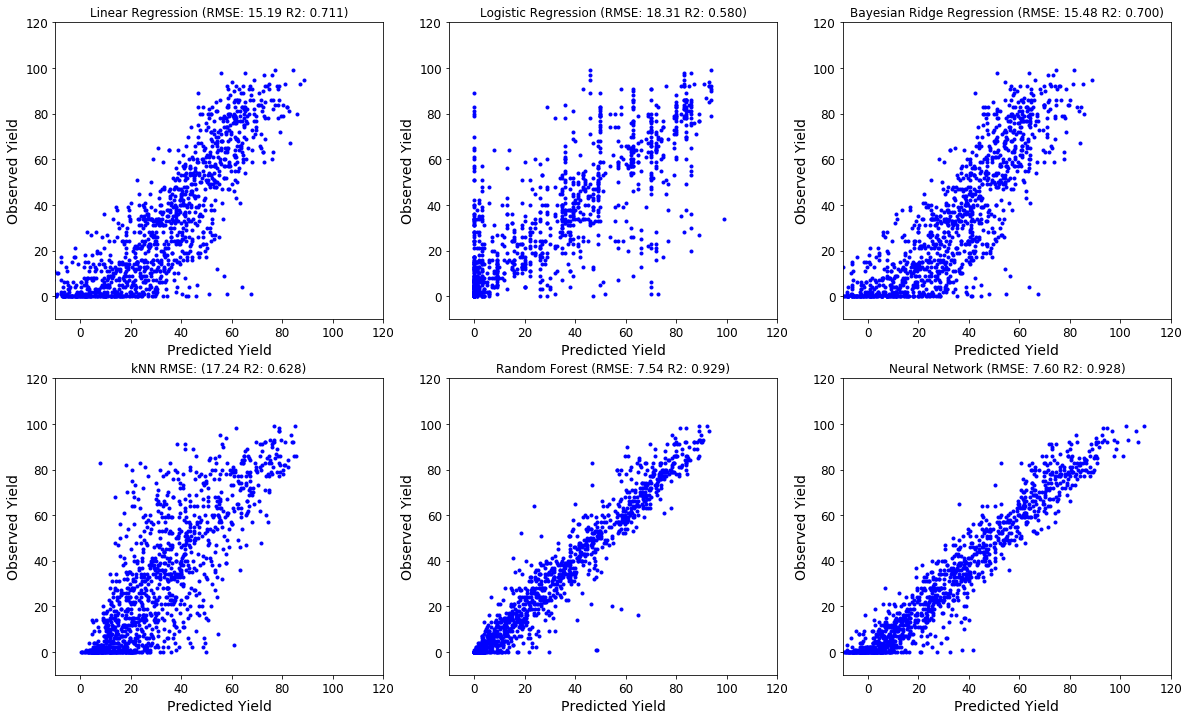

In [54]:
plt.figure(figsize=(20,12))

plt.subplot(231)
plt.plot(y_pred_lin, y_test, 'b.')
plt.title('Linear Regression (RMSE: 15.19 R2: 0.711)')
plt.axis([-10, 120, -10, 120])
plt.xlabel('Predicted Yield')
plt.ylabel('Observed Yield')

plt.subplot(232)
plt.plot(y_pred_log, y_test, 'b.')
plt.title('Logistic Regression (RMSE: 18.31 R2: 0.580)')
plt.axis([-10, 120, -10, 120])
plt.xlabel('Predicted Yield')
plt.ylabel('Observed Yield')

plt.subplot(233)
plt.plot(y_pred_bayes, y_test, 'b.')
plt.title('Bayesian Ridge Regression (RMSE: 15.48 R2: 0.700)')
plt.axis([-10, 120, -10, 120])
plt.xlabel('Predicted Yield')
plt.ylabel('Observed Yield')

plt.subplot(234)
plt.plot(y_pred_knn, y_test, 'b.')
plt.title('kNN RMSE: (17.24 R2: 0.628)')
plt.axis([-10, 120, -10, 120])
plt.xlabel('Predicted Yield')
plt.ylabel('Observed Yield')

plt.subplot(235)
plt.plot(y_pred_rf, y_test, 'b.')
plt.title('Random Forest (RMSE: 7.54 R2: 0.929)')
plt.axis([-10, 120, -10, 120])
plt.xlabel('Predicted Yield')
plt.ylabel('Observed Yield')

plt.subplot(236)
plt.plot(y_pred_nn, y_test, 'b.')
plt.title('Neural Network (RMSE: 7.60 R2: 0.928)')
plt.axis([-10, 120, -10, 120])
plt.xlabel('Predicted Yield')
plt.ylabel('Observed Yield')

plt.savefig('Models Comparison')
plt.show()